## Simple demonstration of UnscentedTransform

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from bayesfilt.filters import UnscentedTransform

In [4]:
xm = [0., 0.]
xP = np.eye(len(xm))*1.
ut = UnscentedTransform(
    dim=len(xm), 
    alpha=1, 
    beta=0,
    kappa=1,
    use_cholesky=True,
    model_fun= lambda x: np.sqrt(np.sum(x**2))
)

In [5]:
ym, yP, _ = ut.transform(m=xm, P=xP)
ym, yP

(array([1.15470054]), array([[0.66666667]]))

In [6]:
x_mc_pts = np.atleast_2d(st.multivariate_normal.rvs(mean=xm, cov=xP, size=100000))
y_mc_pts = np.array([ut.model_fun(ix) for ix in x_mc_pts])
y_mc_pts.mean(axis=0), np.cov(y_mc_pts.T)

(1.2554487178166942, array(0.42966805))

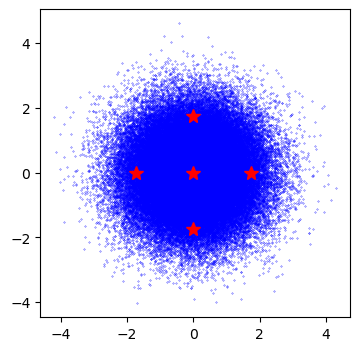

In [7]:
x_sigma_pts  = np.array(ut.get_sigma_points(m=xm, P=xP))
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x_mc_pts[:,0], x_mc_pts[:,1], '.b', markersize=0.5, label='MC')
ax.plot(x_sigma_pts[:,0], x_sigma_pts[:,1], '*r', markersize=10., label='Sigma')